<a href="https://colab.research.google.com/github/priya862/Capstone_3_classification_project/blob/main/C3_Mobile_price_range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Mobile Price Range Prediction

##### **Project Type**    - Classification

##### **Team Member 1 -**Shubham Ashokrao Lawate
##### **Team Member 2 -**Yogesh Suresh Nagpure
##### **Team Member 3 -**Ashish Sunil Mahure
##### **Team Member 4 -**Priya Dhariwal



# **Project Summary -**
This is Mobile Price Range Prediction project is done by group of 4 members – Yogesh Nagpure,Ashish Mahure, shubham and myself and our aim was to predict the stock's closing price of the month.


In this project we get a dataset contains some features, in this we have to observe the dataset and comes to a conclusion to best suitable classification model.


The very First task I did was that I load the data set in our colab and read the csv file given by almabetter team.Then I checked the shape and size of data and got to know that there were 2000 rows and 21 columns(features) .Then next use describe to got the statistical information about our data and here I got to know that the minimum value of px_height and sc_w is zero and I know that px_height and sc_w should never be zero ,So I need to handle this thing.

Then I checked the null values contain in our dataset and got to know that there was no null values in data set.So now our data is ready to fetch.

Then I started Exploratory Data Analysis(EDA) to get some important Insights from that.From the very first graph I got to know that there was equal number of observation for each category and it implies that I didn't have imbalanced target variable.

Then after Exploratory Data Analysis I got to that Ram and price_range shows high correlation which was good sign,it signifies that ram will play major deciding factor in estimating the price range.

There was some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations were justified since there was good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels were different entities despite of showing colinearity. So we had  kept them as they were.

Then I implement 4 classification model
1. Decision tree classifier
2. Gradient Boosting Classifier
3. XGBoost Classifier
4. SVM

Here in this project I used accuracy to compare all the models.And I also used hyperparameter tuning whenever it is required

Then I calculated all the evaluation critera for all the model and then got the best suitable model.


# **GitHub Link -**  https://github.com/priya862/Capstone_3_classification_project

### **PROBLEM STATEMENT**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of
* 0(low cost),
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

# ***Let's Begin !***

#**Know your data**

##**Import Libraries**

In [ ]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### **importing dataset**

In [ ]:
#importing the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# csv file location
df_data = pd.read_csv('/content/drive/MyDrive/Capstone 3/data_mobile_price_range.csv')

# **DATA EXPLORATION**

In [ ]:
#first five rows
df_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Last five rows
df_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#to check the number of rows and colums in data set
df_data.shape

(2000, 21)

In [ ]:
#check the number of columns
df_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#to get the information about dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#checking the statistic of the data
df_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


here we observed that the minimum value of px_height and sc_w is zero and we know that px_height and sc_w should never be zero ,So we need to handle this thing.


In [ ]:
# Now check the total numbers of phones with sc_w=0 by len function
print(len(df_data[df_data.sc_w == 0]))
# Now check the total numbers of phones with px_height=0 by len function
print(len(df_data[df_data.px_height == 0]))

180
2


In [ ]:
#then we replace 0 with the mean values from dataset
df_data['sc_w'][df_data[df_data.sc_w == 0].index] = df_data.sc_w.mean()
df_data['px_height'][df_data[df_data.px_height == 0].index] = df_data.px_height.mean()

In [ ]:
#next is to check for duplicates
len(df_data[df_data.duplicated()])


0

here it is observed that there is no duplicates present in our dataset

In [ ]:
#Check for null values
df_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

in this dataset there is no null value ,so our dataset is ready for EDA

# **EDA(Exploratory data analysis)**

# **price_range_of_mobile**

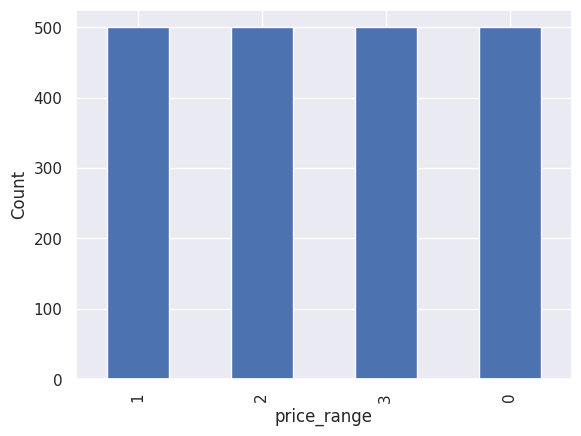

In [ ]:
#lets have look at our target variable
sns.set()
price_plot=df_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

here it is observed that there is equal number of observation for each category.Thus we don't have imbalanced target variable .Accuracy score will be the best evaluation metric for us to select the model.
This is the target variable with value of

* 0=low cost,
* 1=medium cost,
* 2=high cost,
* 3=very high cost.


# **Bluetooth**

<Axes: xlabel='blue', ylabel='price_range'>

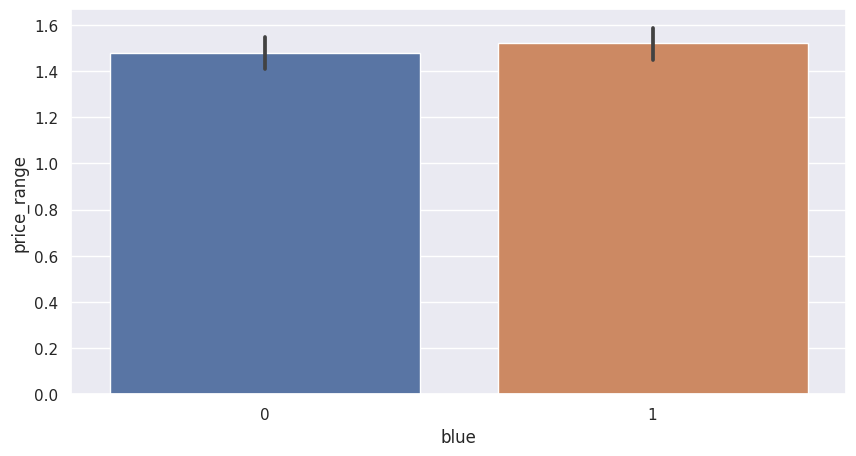

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data= df_data,x='blue',y='price_range',ax=ax)

 half the devices have Bluetooth, and half don’t

# **Ram**

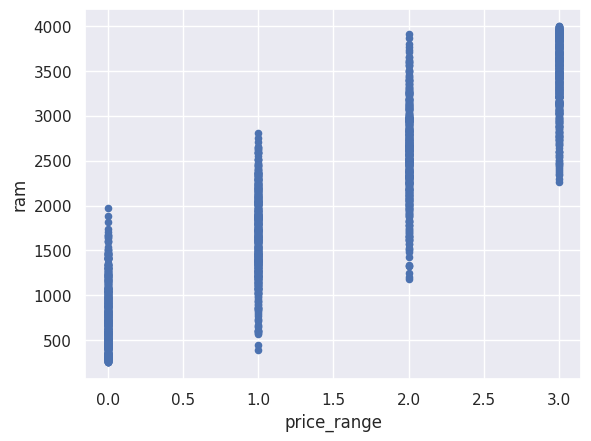

In [ ]:
df_data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost


# **% of phones supports 3g**

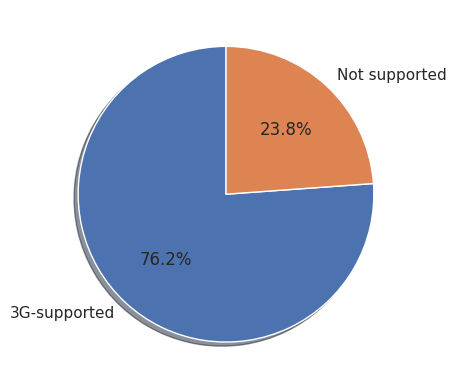

In [ ]:
labels = ["3G-supported",'Not supported']
values=df_data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Here it is observed that 76.2% mobile supported 3g connectivity while 23.8 % not

# **% of phones which supports 4g**

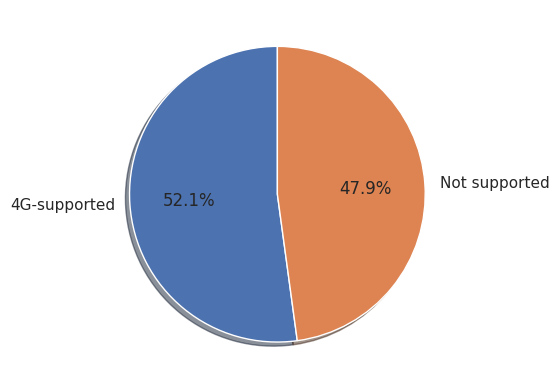

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = df_data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

here 52% mobile supported 4g connectivity while 48% not

# **Battery power of mobile**

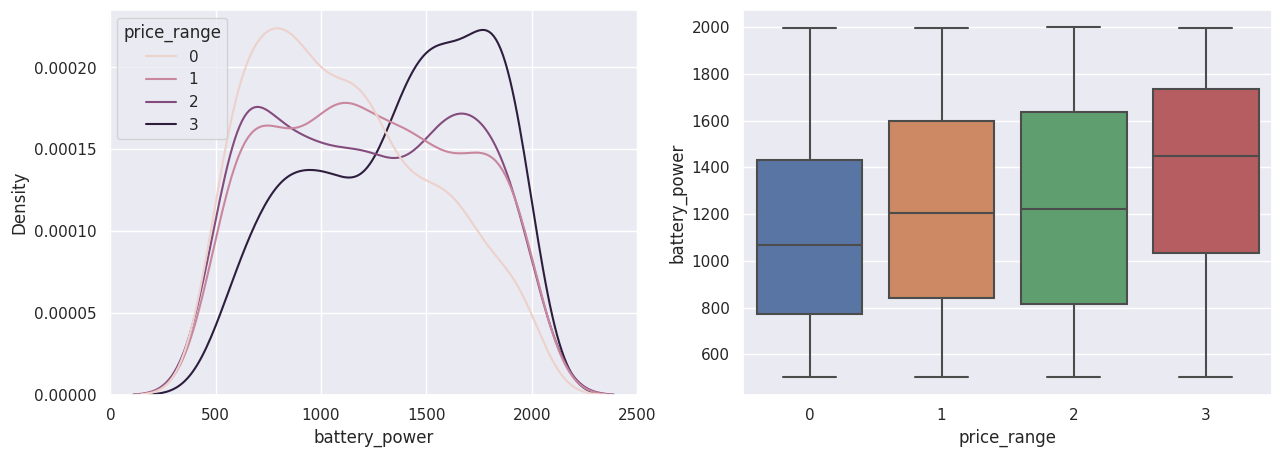

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='battery_power', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='battery_power', ax=axs[1])
plt.show()

Here we can notice clear distribution difference for price_range-0 and price_range-3.

* Mobiles in price_range-0 mostly have lower battery power.
* Mobiles in price_range-3 mostly have higher battery power.
* Mobiles in price_range-1 and price_range-2 also showing some variation in distribtion.


Based on these observations, we can conclude that this feature would be importand for predicting price_range.

# **Clock speed**

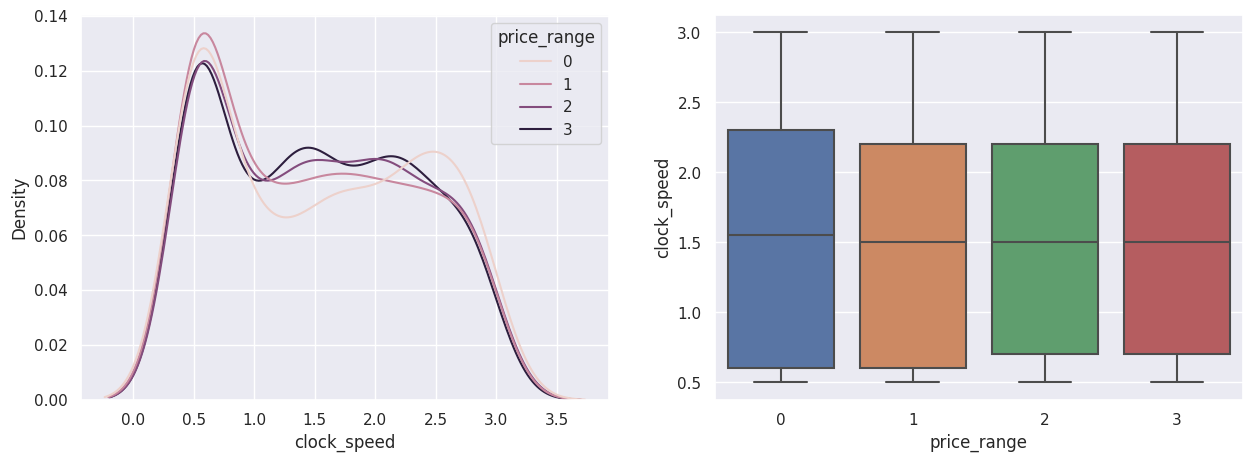

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='clock_speed', hue='price_range',ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='clock_speed', ax=axs[1])
plt.show()

The Clock Speed distribution is very similar along all the price ranges except 0 , which is a little different.

# **FC front camera megapixels**

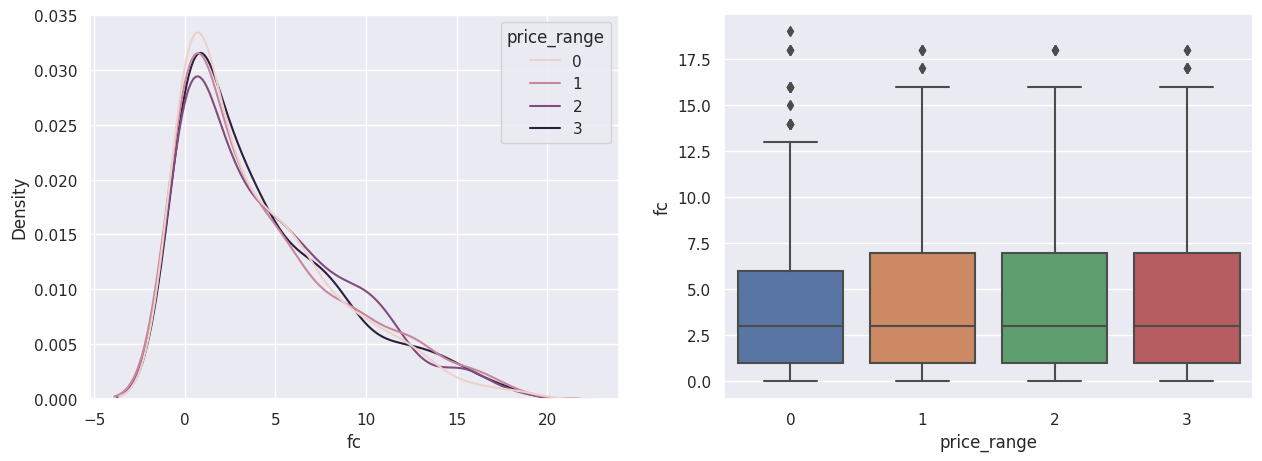

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='fc', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='fc', ax=axs[1])
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

# **Internal memory**

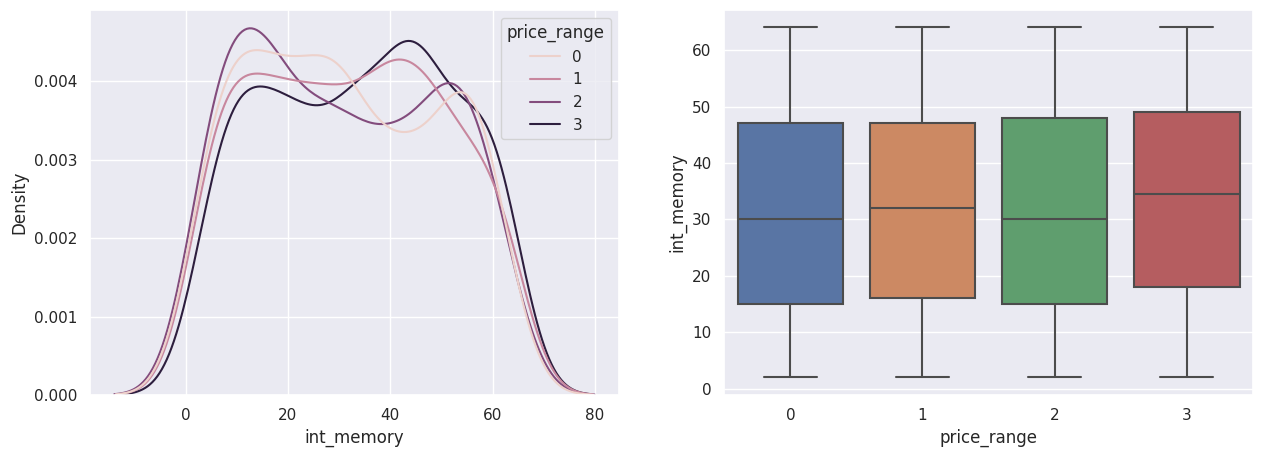

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='int_memory', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='int_memory', ax=axs[1])
plt.show()


There is a little variation in the Internal Memory along the Price range. Mobiles with higher price seems to have higher internal memory. This feature could be helpful in predicting the Price range

# **Mobile depth**

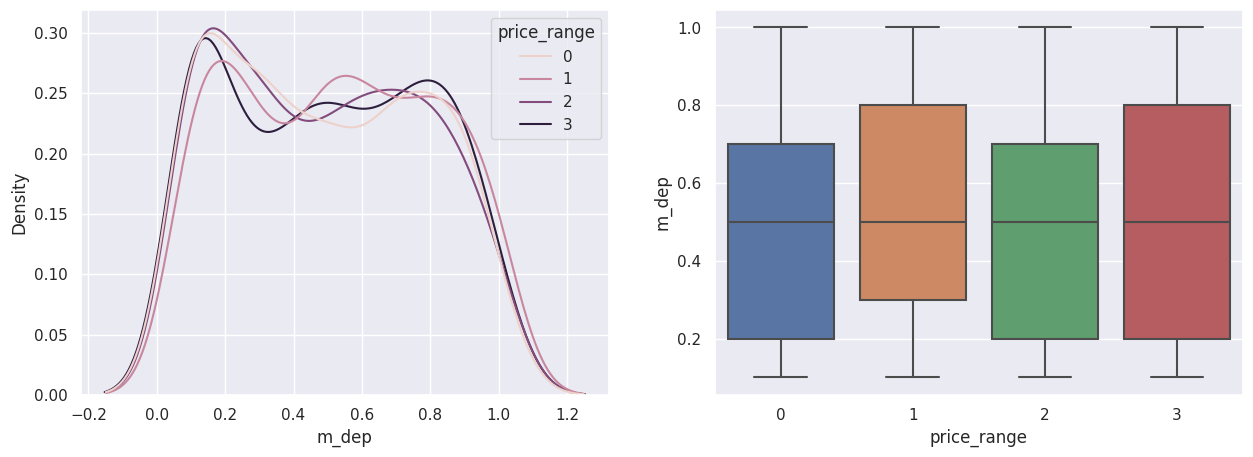

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='m_dep', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='m_dep', ax=axs[1])
plt.show()


Mobile depth again has somewhat similar kind of distribution along all the price_ranges. It's not gonna be a driving factor for deciding price.

# **Mobile weight**

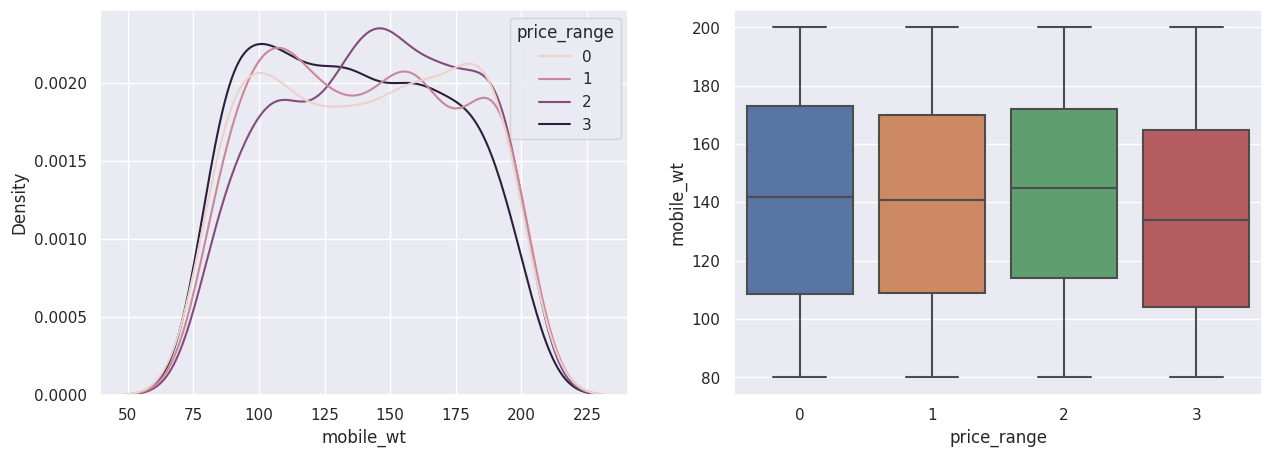

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

Mobile weight is reduced a little bit in the Price category-3 which means costly phones are lighter. A little variation is observed here in all price_ranges.

# **PC (Primary camera Megapixels)**

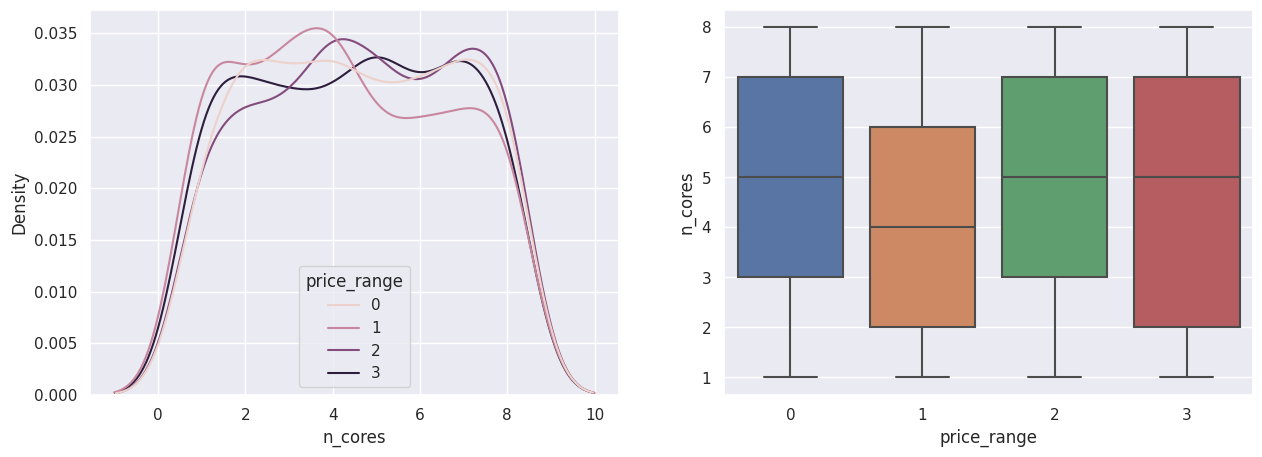

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='n_cores', ax=axs[1])
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

# **Screen size**

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size

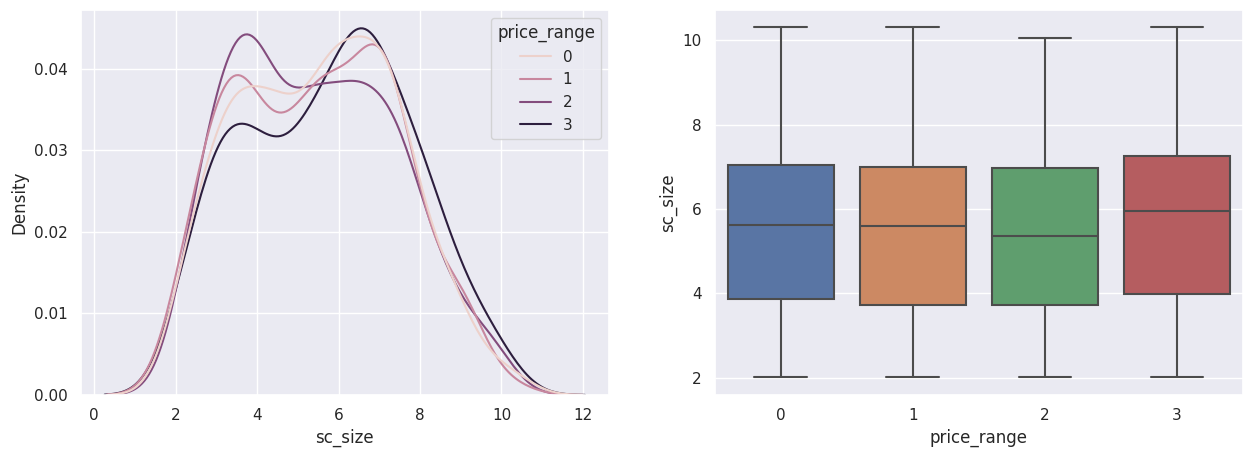

In [ ]:
# Defining new variable sc_size

df_data['sc_size'] = np.sqrt((df_data['sc_h']**2) + (df_data['sc_w']**2))
df_data['sc_size'] = round(df_data['sc_size']/2.54, 2)
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories

# **pixel_width**

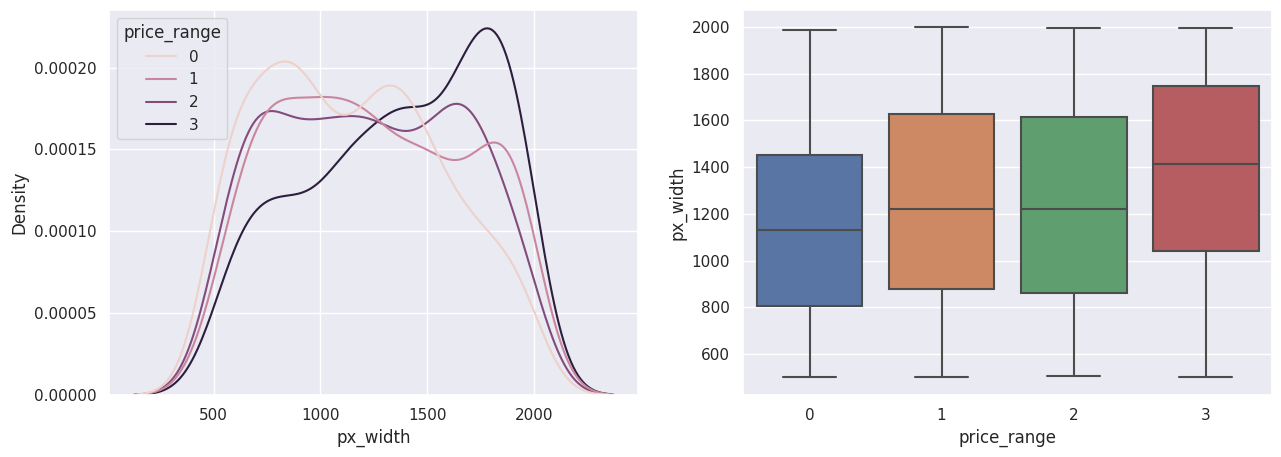

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

# **px_height**(pixel resolution height)

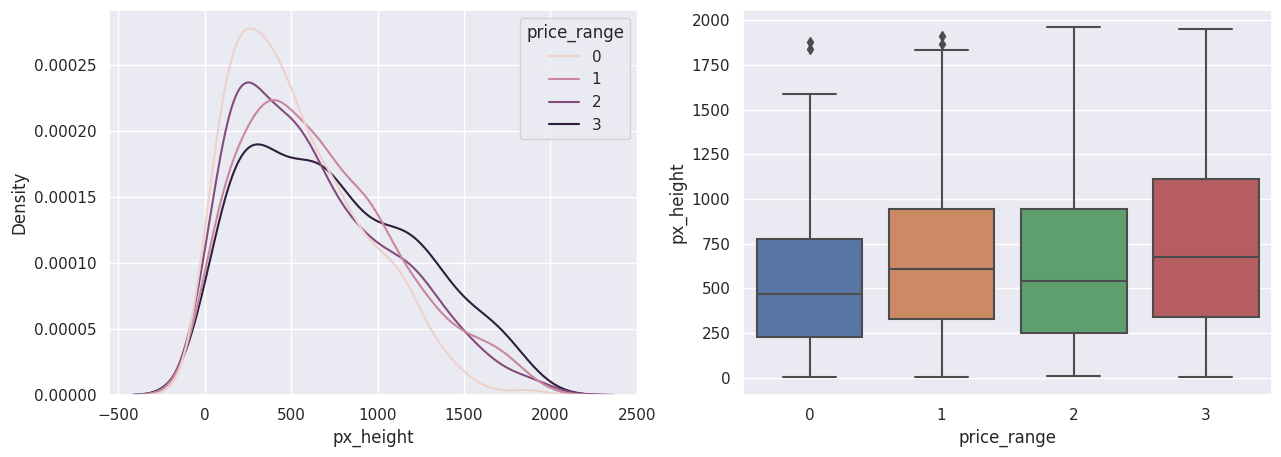

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_data, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df_data, x='price_range', y='px_height', ax=axs[1])
plt.show()

little variation in pixel_height

In [ ]:
# Let's drop sc_h and s_w
df_data.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:
binary_features = [ 'four_g', 'three_g']

In [ ]:
#to check only those column which have null in them
df_data[[i for i in df_data.columns if df_data[i].isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

# **Feature Selection**

<Axes: >

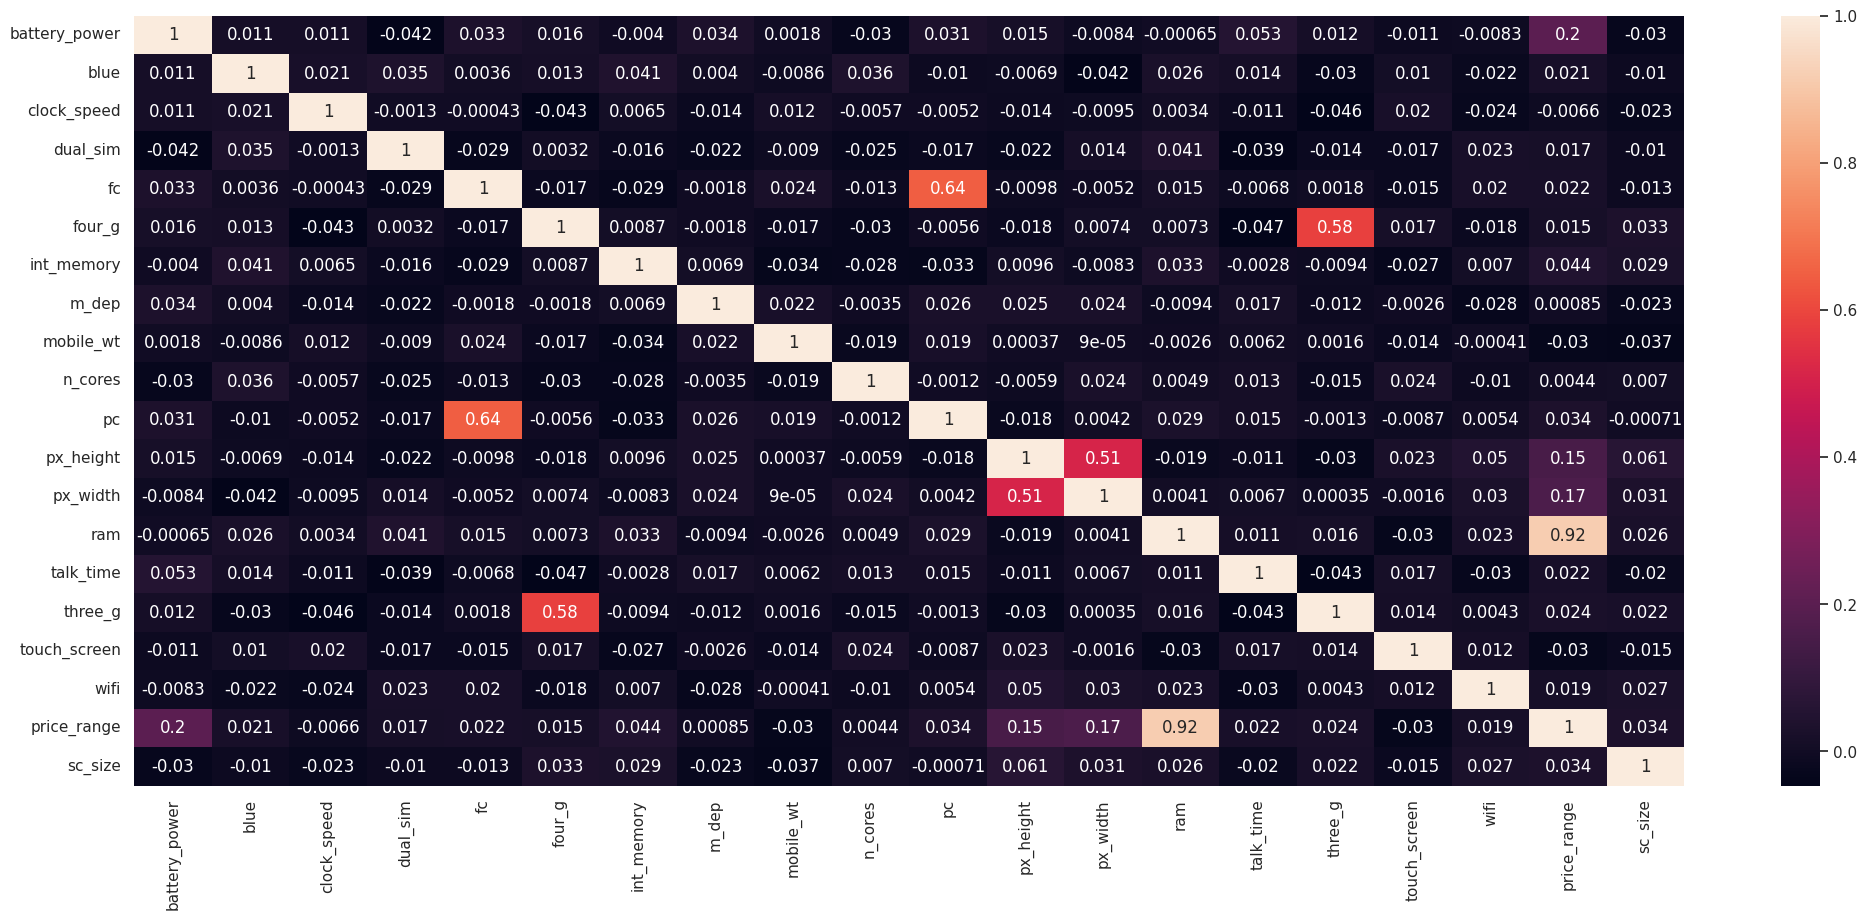

In [ ]:
corr= df_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

In [ ]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=df_data.drop('price_range',axis=1)
y=df_data["price_range"] # Target variable

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#select the  top 12 important features by using SelectKbest python lab
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

The **SelectKBest** method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.

**chi-squared**  can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores


,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [ ]:

# 12 features with highest chi squared statistic
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17590.317434
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
14      talk_time      13.236400
4              fc      10.135166
10             pc       9.186054
9         n_cores       9.097556
18        sc_size       5.366129
16   touch_screen       1.928429


In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=df_data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','talk_time','fc','n_cores','pc','sc_size','touch_screen']]

# dependent varaible
y=df_data['price_range']

In [ ]:
# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **Now Apply Classification Models**

# **1. Decision tree classifier**

In [ ]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [ ]:

# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:

# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)


In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:

# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.855

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix


array([[ 90,   5,   0,   0],
       [  6,  76,  10,   0],
       [  0,  12,  74,  13],
       [  0,   0,  12, 102]])

In [ ]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.82      0.83      0.82        92
           2       0.77      0.75      0.76        99
           3       0.89      0.89      0.89       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



*Train set accuracy is 100% and test accuracy is 85%.*

*Model is overfitted on train set and did not generalised well.*

*We will tune hyperparamters to reduce overfitting and try to imporve the model performance.*


## Let's tune some hypereparameters of Decsion Tree classifier

In [ ]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)


In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.294 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.297 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.300 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.256 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.303 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.291 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.344 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       random_state=0)

In [ ]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.968125

In [ ]:

# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.86

In [ ]:

# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix


array([[ 86,   9,   0,   0],
       [  7,  79,   6,   0],
       [  0,  12,  79,   8],
       [  0,   0,  14, 100]])

In [ ]:

# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       405
           1       0.97      0.94      0.95       408
           2       0.94      0.97      0.96       401
           3       0.99      0.97      0.98       386

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        95
           1       0.79      0.86      0.82        92
           2       0.80      0.80      0.80        99
           3       0.93      0.88      0.90       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [ ]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and
  plots the feature importance graph'''

  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

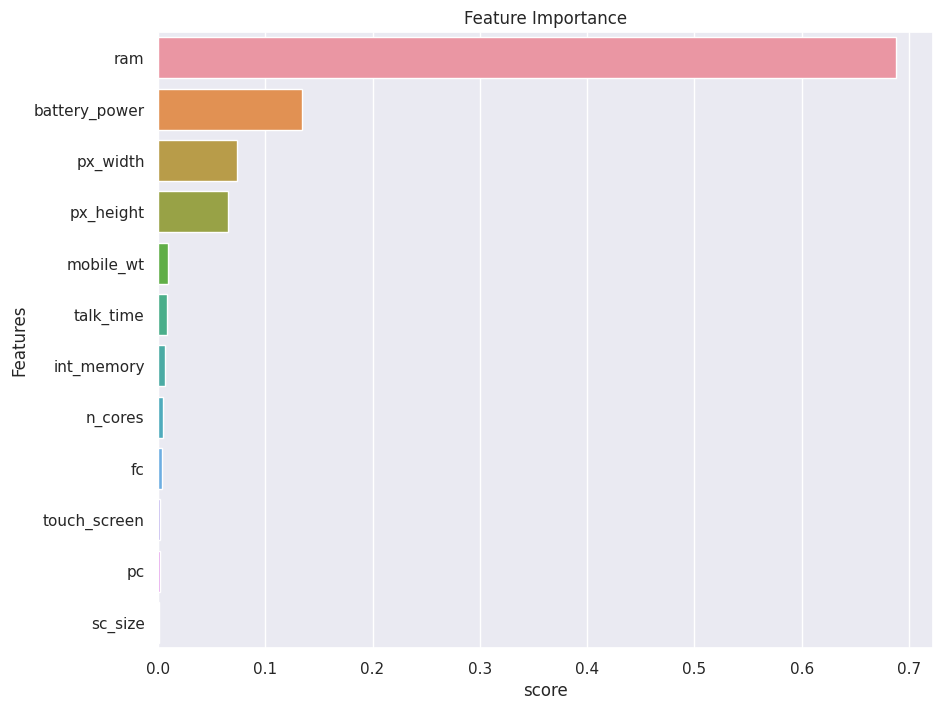

In [ ]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

## Decision Tree Classifier-Observations:

* Train accuarcy has been reduced to 97% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.

* RAM,battery power,px_height and width came out to be the most important featrures



# **2. Gradient Boosting Classifier:**
i) Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. ii) Gradient Boosting Algorithm can be used in regression as well as classification problems.



In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)



In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:

# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

0.99875

In [ ]:

# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.915

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix


array([[ 91,   4,   0,   0],
       [  3,  82,   7,   0],
       [  0,   8,  86,   5],
       [  0,   0,   7, 107]])

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:

# printing the classification report for test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        95
           1       0.87      0.89      0.88        92
           2       0.86      0.87      0.86        99
           3       0.96      0.94      0.95       114

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



## let's do some hyperparameter tuning.

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)


In [ ]:

# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.05,1,2,3],
             'min_samples_split':range(10,26)

             }


In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 13}

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=13,
                           random_state=0)

In [ ]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=0.5,random_state=0,min_samples_split=7)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, min_samples_split=7,
                           random_state=0)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)


In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:

# test set accuracy score
accuracy_score(y_test,y_pred)


0.925

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[ 92,   3,   0,   0],
       [  4,  82,   6,   0],
       [  0,   6,  89,   4],
       [  0,   0,   7, 107]])

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.90      0.89      0.90        92
           2       0.87      0.90      0.89        99
           3       0.96      0.94      0.95       114

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



#Observations of Gradient Boost Classifiers:
*Before tunning:*

*Train accuracy score= 100%.*
*Test accuracy score= 92%*
*Model did not generalised well and overfitted the training data.* *so we tuned hyperparameters of model.*

*After Hyperparameter Tuning*

*Train accuracy score= 100%*
*Test accuarcy score=93%*
*Thus we slightly improved the model performance.However the model is not best.*

# **3. XGBoost Classifier**


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)


In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)


1.0

In [ ]:

# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)


0.93

In [ ]:

# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix


array([[ 94,   1,   0,   0],
       [  2,  82,   8,   0],
       [  0,   5,  87,   7],
       [  0,   0,   5, 109]])

In [ ]:

# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:

# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.93      0.89      0.91        92
           2       0.87      0.88      0.87        99
           3       0.94      0.96      0.95       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



## Let's Do some Hyperparameter tuning:

In [ ]:
# parameter grid values for GridSearchCv
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.904 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.897 total time=   1.8s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.902 total time=   1.8s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.899 total time=   2.0s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.895 total time=   5.1s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.901 total time=   2.0s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.901 total time=   3.5s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.902 total time=   3.4s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [ ]:

xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 1000, 'subsample': 0.5}

In [ ]:

xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)


In [ ]:

accuracy_score(y_train,y_train_pred)

1.0

In [ ]:

accuracy_score(y_test,y_pred)

0.915

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[ 92,   3,   0,   0],
       [  2,  85,   5,   0],
       [  0,   9,  81,   9],
       [  0,   0,   6, 108]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.88      0.92      0.90        92
           2       0.88      0.82      0.85        99
           3       0.92      0.95      0.94       114

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.92      0.91       400



Here after applying XGBoost Classifier our accuracy for test data get decreases.

# **4. SVM**

In [ ]:
# import library for SVM
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [ ]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train)
y_pred=svc.predict(X_test)

In [ ]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.955625

In [ ]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.955

In [ ]:

cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[ 94,   1,   0,   0],
       [  3,  88,   1,   0],
       [  0,   5,  89,   5],
       [  0,   0,   3, 111]])

In [ ]:

#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       405
           1       0.93      0.96      0.95       408
           2       0.96      0.91      0.93       401
           3       0.96      0.97      0.97       386

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.94      0.96      0.95        92
           2       0.96      0.90      0.93        99
           3       0.96      0.97      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



# Hyperparameter Tuning


In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:

# getting the best parameters
svm_cv.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=0.01, degree=1, gamma=0.01, kernel='poly')

In [ ]:

# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train)
y_pred=svm_optimal.predict(X_test)

In [ ]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)


0.985625

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.97

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[ 94,   1,   0,   0],
       [  1,  89,   2,   0],
       [  0,   3,  94,   2],
       [  0,   0,   3, 111]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.98      0.99      0.98       408
           2       0.98      0.97      0.97       401
           3       0.99      0.99      0.99       386

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:

#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.96      0.97      0.96        92
           2       0.95      0.95      0.95        99
           3       0.98      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



* here after Hyperparameter tuning the test accuracy score increased to 97%
* Svm performed well as compared to other algorithms.
* f1 score for individual classes is also very good

# **Conclusion**

* here in the dataset there is no any null value,no duplicate values.
* EDA Conclusion
1. there is equal number of observation for each category.
2. half the devices have bluetooth and don't have.
3. Ram has continuous increase with the price range.
4. 76.2 % supported 3g and 23.8% not.
5. 52% mobile supported 4g and 48% not.
6. got 12 important feature for our model .

* applied four classification models
1. Decision tree classifier
2. Gradient Boosting Classifier
3. XGBoost Classifier
4. SVM
And got to know that SVM is the best suitable model for our dataset.